In [1]:
import pandas as pd
import matplotlib, matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
covdata = pd.read_csv('COVID19 Hackathon Dataset.csv')

In [3]:
covdata

,Date,Continent,Countries,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Weekly_Cases,Weekly_Deaths,Population_Density,...,Diabetes Prevelance % of Population 20-79,Labour Force Total,Population,Population Aged 65 and above % of Total,Urban Population,Death Rate Per 1000 (2017),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (2017)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017)",Hospital Beds Year,Hospital Beds Per 1000 People
0,2019-12-31,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5
1,2020-01-01,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5
2,2020-01-02,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5
3,2020-01-03,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5
4,2020-01-04,Asia,Afghanistan,0.0,0.0,0.0,0.0,NaN,NaN,59.6,...,9.2,10699797.0,38041754.0,2.615794,9797273.0,6.575,56.910808,100.0,2015.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41777,2020-10-03,Africa,Zimbabwe,8.0,0.0,7858.0,228.0,71.0,1.0,38.4,...,1.8,7039493.0,14645468.0,2.980608,4717305.0,8.044,22.251671,100.0,2011.0,1.7
41778,2020-10-04,Africa,Zimbabwe,27.0,0.0,7885.0,228.0,82.0,1.0,38.4,...,1.8,7039493.0,14645468.0,2.980608,4717305.0,8.044,22.251671,100.0,2011.0,1.7
41779,2020-10-05,Africa,Zimbabwe,0.0,0.0,7885.0,228.0,73.0,1.0,38.4,...,1.8,7039493.0,14645468.0,2.980608,4717305.0,8.044,22.251671,100.0,2011.0,1.7
41780,2020-10-06,Africa,Zimbabwe,13.0,0.0,7898.0,228.0,82.0,0.0,38.4,...,1.8,7039493.0,14645468.0,2.980608,4717305.0,8.044,22.251671,100.0,2011.0,1.7


In [4]:
covdata.isnull().any()

Date                                                                                                   False
Continent                                                                                              False
Countries                                                                                              False
New_Cases                                                                                               True
New_Deaths                                                                                              True
Total_Cases                                                                                             True
Total_Deaths                                                                                            True
Weekly_Cases                                                                                            True
Weekly_Deaths                                                                                           True
Population_Density 

In [5]:
covdf = covdata.fillna(0)

In [6]:
covdf.columns

Index(['Date', 'Continent', 'Countries', 'New_Cases', 'New_Deaths',
       'Total_Cases', 'Total_Deaths', 'Weekly_Cases', 'Weekly_Deaths',
       'Population_Density', 'Fertility_Rate', 'GDP_PPP', 'Corruption',
       'Government_Effectiveness', 'Political_Stability', 'Rule_of_Law',
       'Government_Healthcare_Spend', 'Urban_Population', 'Smoking_Prevalence',
       'Tourism', 'Women_In_Parliament', 'Obesity_Rate', 'RunTot_New_Cases',
       'RunTot_New_Deaths', 'Country', 'Country Code', 'Year',
       'Diabetes Prevelance % of Population 20-79', 'Labour Force Total',
       'Population', 'Population Aged 65 and above % of Total',
       'Urban Population', 'Death Rate Per 1000 (2017)',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (2017)',
       'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017)',
       'Hospital Beds Year', 'Hospital Beds Per 1000 People'],
      dtype='object')

In [7]:
correlation_mat = covdf.corr()


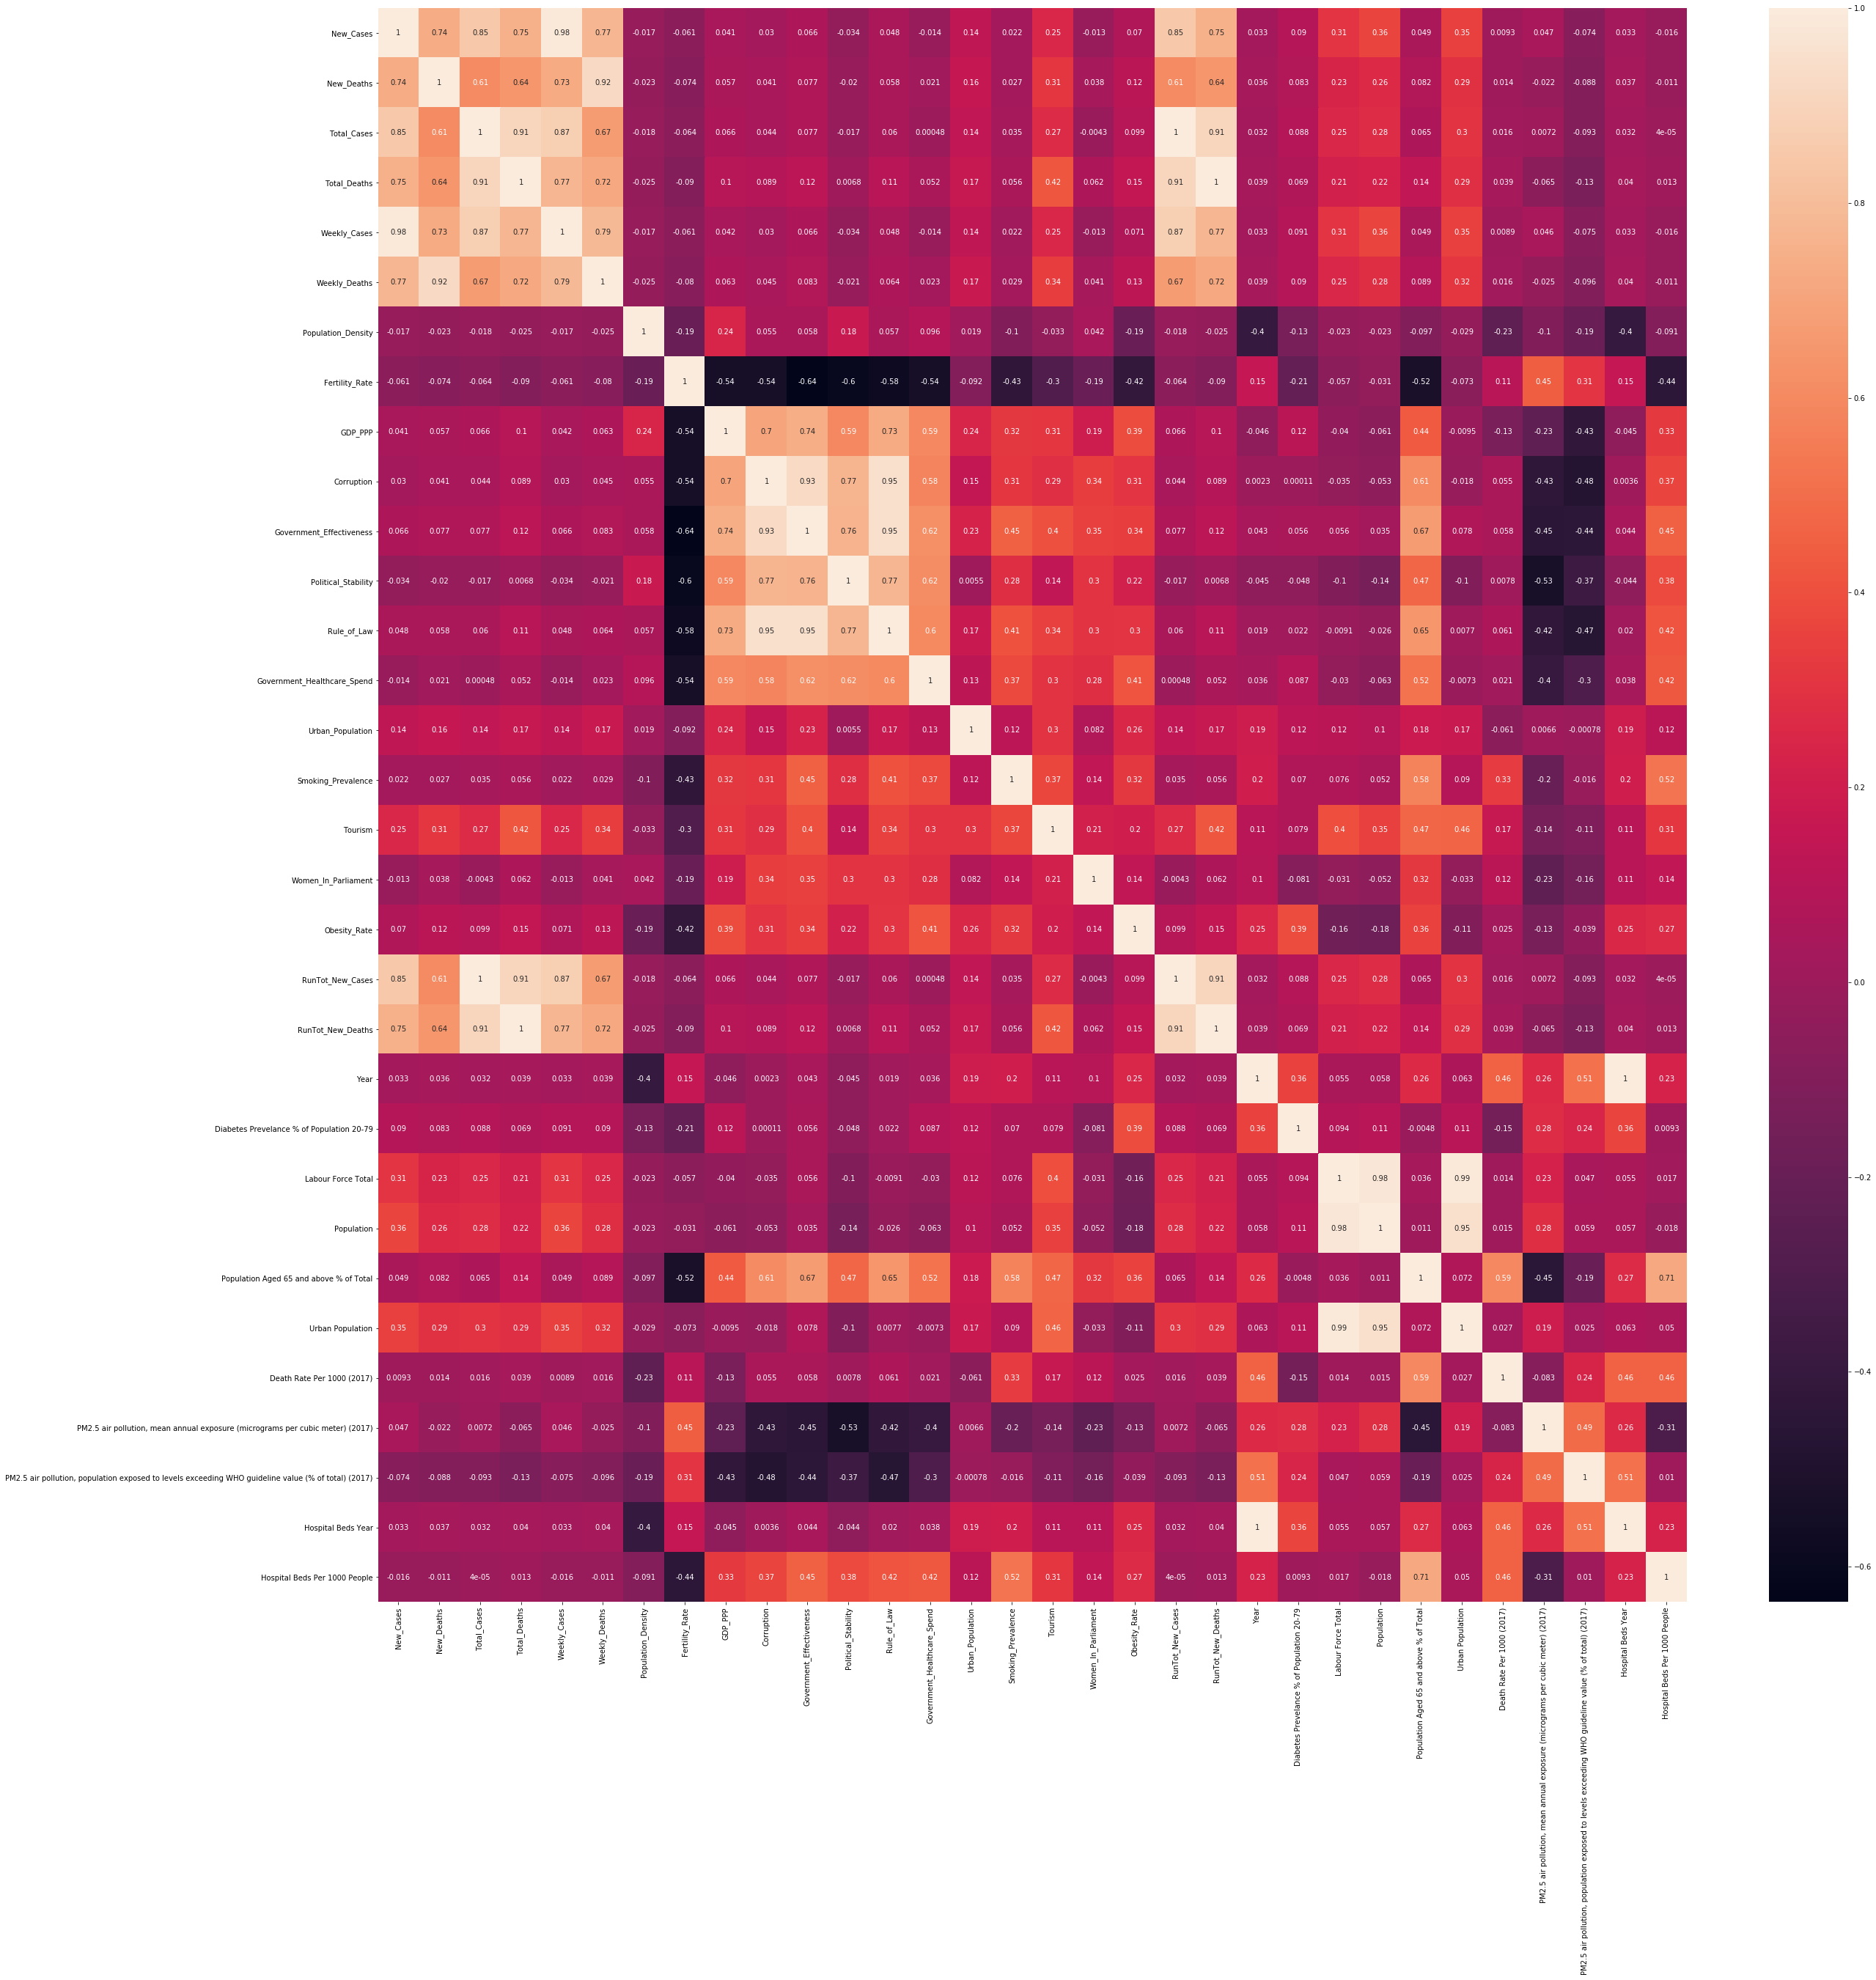

In [8]:
plt.figure(figsize=(40,40))
sns.heatmap(covdf.corr(),annot = True)
plt.savefig('heatmap.png',dpi=300)

In [9]:
covdata.Population

0        38041754.0
1        38041754.0
2        38041754.0
3        38041754.0
4        38041754.0
            ...    
41777    14645468.0
41778    14645468.0
41779    14645468.0
41780    14645468.0
41781    14645468.0
Name: Population, Length: 41782, dtype: float64

In [10]:
country_agg = pd.Series(covdf.Country.unique())

In [11]:
covdf.aggregate({'New_Cases':'sum'})

New_Cases    35744570.0
dtype: float64

In [12]:
covdf.groupby('Country')['New_Cases'].sum()

Country
0              57828.0
Afghanistan    39548.0
Albania        14568.0
Algeria        52399.0
Andorra         2370.0
                ...   
Venezuela      79796.0
Vietnam         1098.0
Yemen           2045.0
Zambia         15170.0
Zimbabwe        7915.0
Name: New_Cases, Length: 174, dtype: float64

In [13]:
political = ['Women_In_Parliament','Labour Force Total','Corruption','Government_Effectiveness','Political_Stability','Rule_of_Law,','Government_Healthcare_Spend']

In [14]:
cov_pol_agg = covdf.groupby('Country').agg(New_cases=('New_Cases', sum), New_Deaths = ('New_Deaths', sum), Corruption = ('Corruption', 'mean'), Gov_eff = ('Government_Effectiveness', 'mean'), Poli_stability = ('Political_Stability', 'mean'), Rule_of_Law = ('Rule_of_Law', 'mean'), Government_Healthcare_Spend = ('Government_Healthcare_Spend', 'mean'), Population = ('Population', 'mean'))


In [15]:
cov_pol_agg['Death_percent'] = (cov_pol_agg['New_Deaths']/cov_pol_agg['Population'])*100

cov_pol_agg['Case_percent'] = (cov_pol_agg['New_cases']/cov_pol_agg['Population'])*100

In [18]:
cov_pol_agg.reset_index(level=0, inplace=True)


In [22]:
covdata.Country[covdata.Rule_of_Law == -0.101688]

Series([], Name: Country, dtype: object)

In [20]:
cov_pol_agg

,Country,New_cases,New_Deaths,Corruption,Gov_eff,Poli_stability,Rule_of_Law,Government_Healthcare_Spend,Population,Death_percent,Case_percent
0,0,57828.0,513.0,-0.014890,-0.175540,0.122887,-0.101688,0.453620,0.0,inf,inf
1,Afghanistan,39548.0,1469.0,-1.496648,-1.457285,-2.746730,-1.668478,0.050958,38041754.0,0.003862,0.103959
2,Albania,14568.0,403.0,-0.521867,0.114788,0.382100,-0.392243,0.000000,2854191.0,0.014120,0.510407
3,Algeria,52399.0,1773.0,-0.636465,-0.443925,-0.793785,-0.775309,0.659547,43053054.0,0.004118,0.121708
4,Andorra,2370.0,53.0,1.238614,1.944976,1.425432,1.607738,0.490320,77142.0,0.068704,3.072256
...,...,...,...,...,...,...,...,...,...,...,...
169,Venezuela,79796.0,665.0,-1.467512,-1.581517,-1.343512,-2.338622,0.159387,28515829.0,0.002332,0.279831
170,Vietnam,1098.0,35.0,-0.485357,-0.003445,0.203266,-0.003282,0.486229,96462106.0,0.000036,0.001138
171,Yemen,2045.0,593.0,-1.637971,-2.244354,-3.002496,-1.790394,0.000000,29161922.0,0.002033,0.007013
172,Zambia,15170.0,334.0,-0.656137,-0.559209,0.141994,-0.344938,0.386330,17861030.0,0.001870,0.084934


(0, 5)

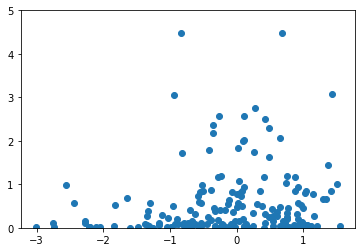

In [113]:
plt.scatter(cov_pol_agg.Poli_stability, cov_pol_agg.Case_percent)
# plt.scatter(cov_pol_agg.Poli_stability, cov_pol_agg.Death_percent)
plt.ylim(0,5)

(0, 0.1)

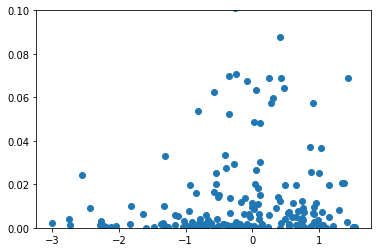

In [89]:
plt.scatter(cov_pol_agg.Poli_stability, cov_pol_agg.Death_percent)
plt.ylim(0,0.1)

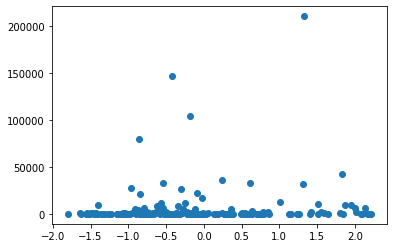

In [74]:
plt.scatter(cov_pol_agg.Corruption, cov_pol_agg.New_Deaths)
# plt.ylim(0,50000)

(0, 7)

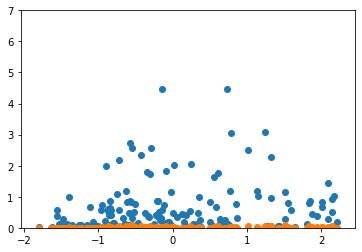

In [111]:
plt.scatter(cov_pol_agg.Corruption, cov_pol_agg.Case_percent)
plt.scatter(cov_pol_agg.Corruption, cov_pol_agg.Death_percent)
plt.ylim(0,7)

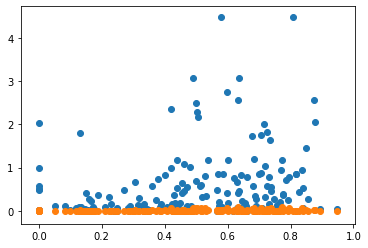

In [103]:
plt.scatter(cov_pol_agg.Government_Healthcare_Spend, cov_pol_agg.Case_percent)
plt.scatter(cov_pol_agg.Government_Healthcare_Spend, cov_pol_agg.Death_percent)
# plt.ylim(0,50000)



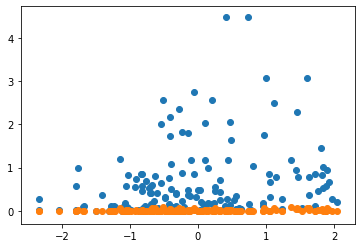

In [104]:
plt.scatter(cov_pol_agg.Rule_of_Law, cov_pol_agg.Case_percent)
plt.scatter(cov_pol_agg.Rule_of_Law, cov_pol_agg.Death_percent)

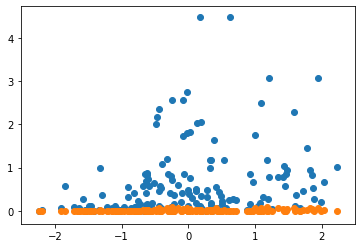

In [110]:
plt.scatter(cov_pol_agg.Gov_eff, cov_pol_agg.Case_percent)
plt.scatter(cov_pol_agg.Gov_eff, cov_pol_agg.Death_percent)

In [13]:
corr_pairs = correlation_mat.unstack()


In [115]:
cov_pol_agg.to_csv('aggregate_political_dataset.csv', sep='\t', index=False)

In [14]:
correlation_mat

,New_Cases,New_Deaths,Total_Cases,Total_Deaths,Weekly_Cases,Weekly_Deaths,Population_Density,Fertility_Rate,GDP_PPP,Corruption,...,Diabetes Prevelance % of Population 20-79,Labour Force Total,Population,Population Aged 65 and above % of Total,Urban Population,Death Rate Per 1000 (2017),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter) (2017)","PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017)",Hospital Beds Year,Hospital Beds Per 1000 People
New_Cases,1.000000,0.735109,0.847127,0.752957,0.982296,0.771932,-0.017316,-0.061259,0.041476,0.029815,...,0.089521,0.307937,0.363768,0.049500,0.345313,0.009257,0.046640,-0.074188,0.033206,-0.015783
New_Deaths,0.735109,1.000000,0.605602,0.644484,0.726358,0.917072,-0.022908,-0.074261,0.057222,0.041466,...,0.083099,0.233730,0.260892,0.081769,0.292897,0.014408,-0.021966,-0.087689,0.036701,-0.010520
Total_Cases,0.847127,0.605602,1.000000,0.909653,0.872460,0.670249,-0.017780,-0.064176,0.066034,0.043867,...,0.087856,0.247121,0.276583,0.065046,0.299324,0.015926,0.007241,-0.092779,0.032460,0.000040
Total_Deaths,0.752957,0.644484,0.909653,1.000000,0.772741,0.717557,-0.024860,-0.089905,0.103696,0.089325,...,0.069332,0.214318,0.224455,0.137050,0.288330,0.038544,-0.065496,-0.127223,0.039633,0.012682
Weekly_Cases,0.982296,0.726358,0.872460,0.772741,1.000000,0.788205,-0.017436,-0.061488,0.041923,0.029661,...,0.090746,0.308832,0.364410,0.049278,0.347019,0.008892,0.046253,-0.075252,0.033361,-0.016222
Weekly_Deaths,0.771932,0.917072,0.670249,0.717557,0.788205,1.000000,-0.024718,-0.080164,0.062573,0.045486,...,0.089623,0.250941,0.279635,0.088847,0.315225,0.015725,-0.024821,-0.095510,0.039566,-0.011280
Population_Density,-0.017316,-0.022908,-0.017780,-0.024860,-0.017436,-0.024718,1.000000,-0.194051,0.239634,0.055441,...,-0.131839,-0.022836,-0.022583,-0.096585,-0.028876,-0.229065,-0.104119,-0.193491,-0.402426,-0.091428
Fertility_Rate,-0.061259,-0.074261,-0.064176,-0.089905,-0.061488,-0.080164,-0.194051,1.000000,-0.537640,-0.537274,...,-0.210023,-0.056581,-0.030872,-0.523237,-0.072525,0.109605,0.449205,0.305102,0.151490,-0.442935
GDP_PPP,0.041476,0.057222,0.066034,0.103696,0.041923,0.062573,0.239634,-0.537640,1.000000,0.700947,...,0.116910,-0.039711,-0.061214,0.436016,-0.009466,-0.126968,-0.232921,-0.425103,-0.044531,0.325568
Corruption,0.029815,0.041466,0.043867,0.089325,0.029661,0.045486,0.055441,-0.537274,0.700947,1.000000,...,0.000109,-0.035023,-0.053131,0.606310,-0.017758,0.054658,-0.434225,-0.482480,0.003586,0.365304


In [15]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

negative_pairs = sorted_pairs[sorted_pairs < -0.5]
#why did you pick under 0 and not 0.5?

positive_pairs = sorted_pairs[sorted_pairs > 0.5] 

In [16]:
postest = pd.DataFrame(data=positive_pairs)

In [17]:
postest.index.name = 'Pair'
postest.reset_index(inplace=True)

In [18]:
pos_double_index = postest[postest.level_0 == postest.level_1].index
postest.drop(pos_double_index, inplace=True)

In [20]:
negtest = pd.DataFrame(data=negative_pairs)

In [21]:
negtest.index.name = 'Pair'
negtest.reset_index(inplace=True)

In [24]:
postest.level_0.unique()

array(['Hospital Beds Year',
       'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017)',
       'Year', 'Population Aged 65 and above % of Total',
       'Government_Healthcare_Spend', 'Smoking_Prevalence',
       'Hospital Beds Per 1000 People', 'Corruption', 'GDP_PPP',
       'Political_Stability', 'Death Rate Per 1000 (2017)', 'Rule_of_Law',
       'New_Deaths', 'RunTot_New_Cases', 'Total_Cases',
       'Government_Effectiveness', 'RunTot_New_Deaths', 'Total_Deaths',
       'Weekly_Deaths', 'Weekly_Cases', 'New_Cases', 'Population',
       'Urban Population', 'Labour Force Total'], dtype=object)

In [25]:
postest.level_1.unique()

array(['PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total) (2017)',
       'Hospital Beds Year', 'Year', 'Government_Healthcare_Spend',
       'Population Aged 65 and above % of Total',
       'Hospital Beds Per 1000 People', 'Smoking_Prevalence',
       'Corruption', 'GDP_PPP', 'Political_Stability',
       'Death Rate Per 1000 (2017)', 'Rule_of_Law', 'RunTot_New_Cases',
       'New_Deaths', 'Total_Cases', 'Government_Effectiveness',
       'RunTot_New_Deaths', 'Total_Deaths', 'Weekly_Deaths',
       'Weekly_Cases', 'New_Cases', 'Urban Population', 'Population',
       'Labour Force Total'], dtype=object)

In [32]:
postest['check'] = postest.apply(lambda row: row.level_0 + row.level_1, axis =1)

In [33]:
postest.check

0      Hospital Beds YearPM2.5 air pollution, populat...
1      PM2.5 air pollution, population exposed to lev...
2      PM2.5 air pollution, population exposed to lev...
3      YearPM2.5 air pollution, population exposed to...
4      Population Aged 65 and above % of TotalGovernm...
                             ...                        
109                               Hospital Beds YearYear
110                          Total_CasesRunTot_New_Cases
111                          RunTot_New_CasesTotal_Cases
112                        Total_DeathsRunTot_New_Deaths
113                        RunTot_New_DeathsTotal_Deaths
Name: check, Length: 114, dtype: object

In [36]:
postest['check'] = [sorted([a,b]) for a,b in zip(postest.level_0, postest.level_1)]

In [43]:
postest['check'] = postest['check'].astype(str)
postest.drop_duplicates(subset=['check'], inplace=True)

In [48]:
len(postest)

57

,index,level_0,level_1,0,check
0,0,Hospital Beds Year,"PM2.5 air pollution, population exposed to lev...",0.510326,"['Hospital Beds Year', 'PM2.5 air pollution, p..."
1,2,"PM2.5 air pollution, population exposed to lev...",Year,0.510968,"['PM2.5 air pollution, population exposed to l..."
2,4,Population Aged 65 and above % of Total,Government_Healthcare_Spend,0.515015,"['Government_Healthcare_Spend', 'Population Ag..."
3,6,Smoking_Prevalence,Hospital Beds Per 1000 People,0.521773,"['Hospital Beds Per 1000 People', 'Smoking_Pre..."
4,8,Population Aged 65 and above % of Total,Smoking_Prevalence,0.577187,"['Population Aged 65 and above % of Total', 'S..."
5,10,Corruption,Government_Healthcare_Spend,0.581631,"['Corruption', 'Government_Healthcare_Spend']"
6,12,Government_Healthcare_Spend,GDP_PPP,0.591431,"['GDP_PPP', 'Government_Healthcare_Spend']"
7,14,GDP_PPP,Political_Stability,0.592649,"['GDP_PPP', 'Political_Stability']"
8,16,Death Rate Per 1000 (2017),Population Aged 65 and above % of Total,0.593103,"['Death Rate Per 1000 (2017)', 'Population Age..."
9,18,Rule_of_Law,Government_Healthcare_Spend,0.603223,"['Government_Healthcare_Spend', 'Rule_of_Law']"


In [52]:
political = ['Women_In_Parliament','Labour Force Total','Corruption','Government_Effectiveness','Political_Stability','Rule_of_Law,','Government_Healthcare_Spend']

In [53]:
postest[postest.level_0.isin(political)]

,level_0,level_1,0,check
10,Corruption,Government_Healthcare_Spend,0.581631,"['Corruption', 'Government_Healthcare_Spend']"
12,Government_Healthcare_Spend,GDP_PPP,0.591431,"['GDP_PPP', 'Government_Healthcare_Spend']"
26,Political_Stability,Government_Healthcare_Spend,0.615792,"['Government_Healthcare_Spend', 'Political_Sta..."
28,Government_Effectiveness,Government_Healthcare_Spend,0.619066,"['Government_Effectiveness', 'Government_Healt..."
42,Corruption,GDP_PPP,0.700947,"['Corruption', 'GDP_PPP']"
56,Government_Effectiveness,GDP_PPP,0.743973,"['GDP_PPP', 'Government_Effectiveness']"
62,Government_Effectiveness,Political_Stability,0.760109,"['Government_Effectiveness', 'Political_Stabil..."
64,Corruption,Political_Stability,0.767542,"['Corruption', 'Political_Stability']"
94,Corruption,Government_Effectiveness,0.926119,"['Corruption', 'Government_Effectiveness']"
102,Labour Force Total,Population,0.977082,"['Labour Force Total', 'Population']"


In [54]:
postest[postest.level_1.isin(political)]

,level_0,level_1,0,check
4,Population Aged 65 and above % of Total,Government_Healthcare_Spend,0.515015,"['Government_Healthcare_Spend', 'Population Ag..."
10,Corruption,Government_Healthcare_Spend,0.581631,"['Corruption', 'Government_Healthcare_Spend']"
14,GDP_PPP,Political_Stability,0.592649,"['GDP_PPP', 'Political_Stability']"
18,Rule_of_Law,Government_Healthcare_Spend,0.603223,"['Government_Healthcare_Spend', 'Rule_of_Law']"
24,Population Aged 65 and above % of Total,Corruption,0.606310,"['Corruption', 'Population Aged 65 and above %..."
26,Political_Stability,Government_Healthcare_Spend,0.615792,"['Government_Healthcare_Spend', 'Political_Sta..."
28,Government_Effectiveness,Government_Healthcare_Spend,0.619066,"['Government_Effectiveness', 'Government_Healt..."
36,Population Aged 65 and above % of Total,Government_Effectiveness,0.667977,"['Government_Effectiveness', 'Population Aged ..."
62,Government_Effectiveness,Political_Stability,0.760109,"['Government_Effectiveness', 'Political_Stabil..."
64,Corruption,Political_Stability,0.767542,"['Corruption', 'Political_Stability']"


In [57]:
postest[postest.level_1 == 'Total_Cases']

,level_0,level_1,0,check
78,New_Cases,Total_Cases,0.847127,"['New_Cases', 'Total_Cases']"
88,Total_Deaths,Total_Cases,0.909653,"['Total_Cases', 'Total_Deaths']"
90,RunTot_New_Deaths,Total_Cases,0.909653,"['RunTot_New_Deaths', 'Total_Cases']"
